In [1]:
# 1.0 Reset memory
#%reset -f
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder 

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [2]:
# 2.0 Import warnings module
#     No FutureWarnings display
 
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

In [3]:
abc=pd.read_csv("E:\\Mid_term\\train.csv")
#reading file

In [4]:
df=abc.sample(5000)

In [5]:
df.head()
#checking column

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
1064,3471,A,B,A,A,B,A,A,A,B,...,0.215671,0.274162,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537,2247.41
24464,76935,A,A,A,B,A,A,A,A,A,...,0.325690,0.494848,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611,580.00
127648,398346,A,A,A,A,B,A,A,A,A,...,0.460158,0.440595,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549,1825.68
79816,249770,A,A,A,A,A,B,A,A,A,...,0.645123,0.463819,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606,690.66
57412,180026,A,A,A,B,A,B,A,A,A,...,0.781008,0.866125,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534,3788.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1064 to 109241
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 5.1+ MB


# Feature engineering

In [7]:
#As the target of our data was not having significant weightage all were shown on extremely low scale we tried to rescale it by using loss function

In [8]:
#Creating a loss column
df['logarithm_base10'] = np.log10(df['loss'])

In [9]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logarithm_base10
1064,3471,A,B,A,A,B,A,A,A,B,...,0.274162,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537,2247.41,3.351682
24464,76935,A,A,A,B,A,A,A,A,A,...,0.494848,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611,580.00,2.763428
127648,398346,A,A,A,A,B,A,A,A,A,...,0.440595,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549,1825.68,3.261425
79816,249770,A,A,A,A,A,B,A,A,A,...,0.463819,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606,690.66,2.839264
57412,180026,A,A,A,B,A,B,A,A,A,...,0.866125,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534,3788.54,3.578472


In [10]:
#creating bins
df["classification_of_logarithm_base10"] = pd.cut(
                               df['logarithm_base10'],
                               bins = 5,
                               labels= ["extremely low", "low","medium","high" , "extremely high"]
                               )

In [11]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logarithm_base10,classification_of_logarithm_base10
1064,3471,A,B,A,A,B,A,A,A,B,...,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537,2247.41,3.351682,medium
24464,76935,A,A,A,B,A,A,A,A,A,...,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611,580.00,2.763428,low
127648,398346,A,A,A,A,B,A,A,A,A,...,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549,1825.68,3.261425,medium
79816,249770,A,A,A,A,A,B,A,A,A,...,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606,690.66,2.839264,low
57412,180026,A,A,A,B,A,B,A,A,A,...,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534,3788.54,3.578472,high


In [12]:
#removing the uncessary colums
df.drop(['loss','logarithm_base10'], axis=1,inplace= True)

<AxesSubplot:xlabel='classification_of_logarithm_base10', ylabel='count'>

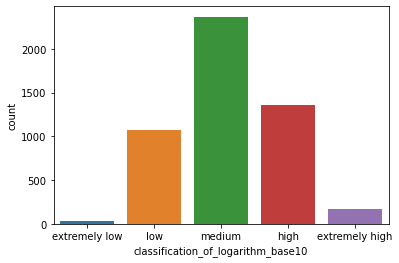

In [13]:
#datavisualization
sns.countplot(x="classification_of_logarithm_base10", data=df)

# Pipelining

In [14]:

# Which columns are numeric and which not
num_cols = ['id','cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']
cat_cols = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20','cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30','cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40','cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50','cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60','cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70','cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80','cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88','cat89','cat90','cat91','cat92','cat93','cat94','cat95','cat96','cat97','cat98','cat99','cat100','cat101','cat102','cat103','cat104','cat105','cat106','cat107','cat108','cat109','cat110','cat111','cat112','cat113','cat114','cat115','cat116']



In [15]:
num_cols

['id',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [16]:
cat_cols

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [17]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', StandardScaler()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [18]:
# Test each pipe
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

<5000x825 sparse matrix of type '<class 'numpy.float64'>'
	with 580000 stored elements in Compressed Sparse Row format>

In [19]:
#fitting cat
ct = ColumnTransformer([ ('nc', nc_pipe, num_cols), ('cp', cat_pipe,cat_cols)])

In [20]:
ct.fit_transform(df)

<5000x840 sparse matrix of type '<class 'numpy.float64'>'
	with 655000 stored elements in Compressed Sparse Row format>

In [21]:
pt = Pipeline([ ('ct', ct), ('dt', DecisionTreeClassifier())])


In [22]:
# Your train data
#loss is removed
y_train = df.pop('classification_of_logarithm_base10')
X_train = df

In [23]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
1064,3471,A,B,A,A,B,A,A,A,B,...,0.800402,0.215671,0.274162,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537
24464,76935,A,A,A,B,A,A,A,A,A,...,0.619060,0.325690,0.494848,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611
127648,398346,A,A,A,A,B,A,A,A,A,...,0.302678,0.460158,0.440595,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549
79816,249770,A,A,A,A,A,B,A,A,A,...,0.422268,0.645123,0.463819,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606
57412,180026,A,A,A,B,A,B,A,A,A,...,0.295397,0.781008,0.866125,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534


In [24]:
# Fit final pipe on the data
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['id', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13',
                                                   'cont14']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
   

In [25]:
# Make predictions
pt.predict(X_train)

array(['medium', 'low', 'medium', ..., 'medium', 'medium', 'high'],
      dtype=object)

In [26]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['id', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13',
                                                   'cont14']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['cat1', 'cat2', 'cat3',
                                                   'cat4', 'cat5', 'cat6',
                                                   'cat7', 'cat8', 'cat9',
                                                   'cat10', 'cat11', 'cat12',
                                                   'cat13', 'cat14', 'cat15',
                                                   'cat16', 'cat17', 'cat18',
                                                   'cat19', 'cat20', 'cat21',
                                                   'cat22', 'cat23', 'cat24',
                                                   'cat25', 'cat26', 'cat27',
                                                   'cat28', 'cat29', 'cat30', ...])])),
                ('dt', DecisionTreeClassifier())])

# Cross Validation

In [27]:
X_train.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
1064,3471,A,B,A,A,B,A,A,A,B,...,0.800402,0.215671,0.274162,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537
24464,76935,A,A,A,B,A,A,A,A,A,...,0.619060,0.325690,0.494848,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611
127648,398346,A,A,A,A,B,A,A,A,A,...,0.302678,0.460158,0.440595,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549
79816,249770,A,A,A,A,A,B,A,A,A,...,0.422268,0.645123,0.463819,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606
57412,180026,A,A,A,B,A,B,A,A,A,...,0.295397,0.781008,0.866125,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534
86428,270634,A,A,A,B,A,A,A,A,A,...,0.783230,0.373500,0.381883,0.36083,0.44352,0.45017,0.338312,0.366307,0.339244,0.708408
101299,316590,A,A,A,A,B,A,A,A,A,...,0.508483,0.519747,0.431493,0.93736,0.51050,0.49444,0.385085,0.377003,0.611431,0.721538
147210,459122,B,A,A,B,A,A,A,A,A,...,0.568839,0.571597,0.538203,0.45883,0.49370,0.52775,0.651133,0.648446,0.369740,0.603326
57796,181237,A,A,A,B,A,A,A,A,A,...,0.281143,0.302142,0.270738,0.57187,0.32865,0.24355,0.269248,0.264760,0.274217,0.464642
140589,438584,A,A,A,A,B,A,A,A,A,...,0.643315,0.668706,0.613736,0.49462,0.45391,0.64056,0.592525,0.590961,0.701266,0.809769


In [28]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [29]:
X=df

In [30]:
lab = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20','cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30','cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40','cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50','cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60','cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70','cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80','cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88','cat89','cat90','cat91','cat92','cat93','cat94','cat95','cat96','cat97','cat98','cat99','cat100','cat101','cat102','cat103','cat104','cat105','cat106','cat107','cat108','cat109','cat110','cat111','cat112','cat113','cat114','cat115','cat116']


In [31]:
X[lab]=X[lab].apply(label_encoder.fit_transform)

In [32]:
X.shape

(5000, 131)

In [33]:
from sklearn.model_selection import cross_val_score


In [34]:
from skopt import BayesSearchCV

In [35]:
from skopt.space import Real, Categorical, Integer

In [36]:
from sklearn.model_selection import StratifiedKFold
cvStrategy = StratifiedKFold(
                             n_splits=3,
                             shuffle=True,
                             random_state=42
                            )

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

The list of models that we will be using as follows:

In [38]:
models = [LogisticRegression(max_iter=3), KNeighborsClassifier(), RandomForestClassifier()]

In [39]:
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
1064,3471,0,1,0,0,1,0,0,0,1,...,0.800402,0.215671,0.274162,0.63475,0.31763,0.21230,0.217678,0.230661,0.310026,0.383537
24464,76935,0,0,0,1,0,0,0,0,0,...,0.619060,0.325690,0.494848,0.44106,0.33611,0.34424,0.334828,0.328268,0.318646,0.252611
127648,398346,0,0,0,0,1,0,0,0,0,...,0.302678,0.460158,0.440595,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.417549
79816,249770,0,0,0,0,0,1,0,0,0,...,0.422268,0.645123,0.463819,0.33906,0.62542,0.66076,0.492200,0.481306,0.678452,0.826606
57412,180026,0,0,0,1,0,1,0,0,0,...,0.295397,0.781008,0.866125,0.31280,0.50840,0.67554,0.880469,0.871011,0.630260,0.235534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39270,123080,0,1,0,0,1,1,0,0,1,...,0.281143,0.884884,0.613502,0.89618,0.81945,0.83202,0.757468,0.744640,0.800060,0.387970
62756,196593,0,0,0,0,1,1,0,0,0,...,0.826714,0.660844,0.454260,0.61229,0.64873,0.74396,0.705501,0.692256,0.689974,0.414673
94731,296330,1,0,0,0,0,1,0,0,0,...,0.302678,0.690216,0.498919,0.33906,0.62542,0.73106,0.622276,0.609277,0.687115,0.602075
83838,262431,0,0,0,0,0,1,0,0,0,...,0.783230,0.353639,0.412835,0.36083,0.44352,0.45017,0.370419,0.362771,0.339244,0.211442


In [40]:
y=y_train

In [41]:
y.shape

(5000,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

In [43]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)
    
    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [44]:
from sklearn.metrics import accuracy_score
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=3)  =  0.474
Accuracy score of the  KNeighborsClassifier()  =  0.342
Accuracy score of the  RandomForestClassifier()  =  0.569


we can see that most accurate score is given by randomforest classifier

In [45]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.474 0.474 0.474 0.473 0.473]
47.36


Likewise we have defined a function to get the average accuracy for all other models and we have taken cv as 5 for all the models.

In [46]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


Now comparing the accuracy of all the models without cross validation and with cross validation. The increase from 56 percent to 57 percent

In [47]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=3) =   [0.474 0.474 0.474 0.473 0.473]
Accuracy % of the  LogisticRegression(max_iter=3) 47.36
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.35  0.358 0.335 0.357 0.371]
Accuracy % of the  KNeighborsClassifier() 35.42
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.581 0.565 0.587 0.584 0.571]
Accuracy % of the  RandomForestClassifier() 57.76
----------------------------------------------


# Hyperparameter Tuning

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [49]:
#GridSearchCV is used for determining the best parameters for our model WE HAVE USED RANDOMFOREST FOR MODELLING



# GridSearch

In [50]:
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [59]:
clf.cv_results_

{'mean_fit_time': array([0.07098753, 0.325616  , 0.42653587, 0.43829634, 0.49046218,
        0.53926878, 0.58713608, 0.65752411, 0.75423942, 0.78616128,
        0.83008766, 0.90449114, 1.01286461, 0.94908721, 0.06795797,
        0.35459633, 0.45608408, 0.4804024 , 0.50372808, 0.57949464,
        0.61257226, 0.68812308, 0.74273403, 0.78398063, 0.84259119,
        0.91251011, 0.91740947, 1.07799988, 0.08424859, 0.51509597,
        0.44582107, 0.71448138, 0.77018816, 0.657359  , 0.76227183,
        0.830597  , 0.84193394, 0.82746069, 1.2388675 , 1.30044868,
        1.22326875, 1.30974643, 0.0822233 , 0.47847948, 0.62296386,
        0.59420416, 0.73037467, 0.79966841, 0.89374743, 0.99525733,
        0.99041536, 1.13054264, 1.09653609, 1.15669978, 1.26518662,
        1.27507524, 0.07072864, 0.43437743, 0.54884651, 0.65297792,
        0.75729203, 0.87525649, 1.07157524, 0.97877994, 1.05964572,
        1.13772488, 1.23662486, 1.4826112 , 1.25456095, 1.32970777]),
 'std_fit_time': array([0.008

In [60]:
highest_accuracy = clf.best_score_
print(highest_accuracy)

0.5787500000000001


In [51]:
print(clf.best_params_)

{'max_depth': 14, 'max_features': 9}


In [52]:
print(clf.best_score_)

0.5787500000000001


# RandomizedSearchCV

In [56]:
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clfK = RandomizedSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clfK.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [10, 11, 12, 13, 14],
                                         'max_features': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13]}],
                   scoring='accuracy')

In [61]:
print(clfK.best_params_)

{'max_features': 11, 'max_depth': 14}


In [62]:
print(clfK.best_score_)

0.5772499999999999


In [63]:
clfK.cv_results_

{'mean_fit_time': array([1.01359739, 0.72171199, 0.89795182, 0.50499001, 0.69801264,
        0.74451613, 0.54189792, 1.14606433, 0.37026675, 0.07018256]),
 'std_fit_time': array([0.03957959, 0.0494086 , 0.03998345, 0.01813757, 0.01463257,
        0.04460855, 0.02496836, 0.02926017, 0.01201693, 0.00862041]),
 'mean_score_time': array([0.02615545, 0.03433437, 0.02643969, 0.02580893, 0.02571137,
        0.02646031, 0.02590883, 0.0285723 , 0.02515154, 0.        ]),
 'std_score_time': array([0.002668  , 0.01326264, 0.00262446, 0.00178706, 0.00232324,
        0.00288013, 0.00319322, 0.00384992, 0.00302103, 0.        ]),
 'param_max_features': masked_array(data=[12, 4, 8, 3, 6, 6, 3, 11, 1, 0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 14, 12, 11, 11, 12, 12, 14, 11, 10],
              mask=[False, False, False, False, False, False

In [64]:
highest_accuracy = clfK.best_score_
print(highest_accuracy)

0.5772499999999999
